In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

2022-03-21 12:52:10.212235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-21 12:52:10.212310: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data = pd.read_csv('cleveland_short.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.595745,4.581560,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,1.236910,2.248467,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   fbs       282 non-null    int64  
 6   restecg   282 non-null    int64  
 7   thalach   282 non-null    int64  
 8   exang     282 non-null    int64  
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    int64  
 11  ca        282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.0 KB


In [5]:
print("The shape of dataset: ", data.shape)

The shape of dataset:  (282, 14)


In [6]:
print("Displaying NA values in each columns: ")
data.isna().sum(axis=0)

Displaying NA values in each columns: 


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
print("Displaying NULL values in each columns: ")
data.isnull().sum()

Displaying NULL values in each columns: 


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
data = data.dropna()

data.shape

(282, 14)

In [9]:
data = data.sample(frac=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
64,54,1,4,120,188,0,0,113,0,1.4,2,1,7,2
273,71,0,4,112,149,0,0,125,0,1.6,2,0,3,0
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
80,45,1,4,104,208,0,2,148,1,3.0,2,0,3,0
187,66,1,2,160,246,0,0,120,1,0.0,2,3,6,2


In [10]:
X_df = data.copy()
Y_df = X_df.pop('num')

print('X Values')
display(X_df)
print('Y Values')
display(Y_df)

print('Shape of X:', X_df.shape)
print('Shape of Y:', Y_df.shape)

X Values


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
64,54,1,4,120,188,0,0,113,0,1.4,2,1,7
273,71,0,4,112,149,0,0,125,0,1.6,2,0,3
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7
80,45,1,4,104,208,0,2,148,1,3.0,2,0,3
187,66,1,2,160,246,0,0,120,1,0.0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,52,1,4,125,212,0,0,168,0,1.0,1,2,7
91,62,0,4,160,164,0,2,145,0,6.2,3,3,7
104,49,1,3,120,188,0,0,139,0,2.0,2,3,7
142,52,1,2,128,205,1,0,184,0,0.0,1,0,3


Y Values


64     2
273    0
9      1
80     0
187    2
      ..
248    3
91     3
104    3
142    0
151    0
Name: num, Length: 282, dtype: int64

Shape of X: (282, 13)
Shape of Y: (282,)


In [11]:
Y_labels = pd.get_dummies(Y_df, prefix='Label')

print('All Labels:')
display(Y_labels)

All Labels:


,Label_0,Label_1,Label_2,Label_3,Label_4
64,0,0,1,0,0
273,1,0,0,0,0
9,0,1,0,0,0
80,1,0,0,0,0
187,0,0,1,0,0
...,...,...,...,...,...
248,0,0,0,1,0
91,0,0,0,1,0
104,0,0,0,1,0
142,1,0,0,0,0


In [12]:
X_stats = X_df.describe()
X_stats = X_stats.transpose()
display(X_stats)

,count,mean,std,min,25%,50%,75%,max
age,282.0,54.411348,9.053083,29.0,48.00,55.0,61.00,77.0
sex,282.0,0.677305,0.468338,0.0,0.00,1.0,1.00,1.0
cp,282.0,3.163121,0.955405,1.0,3.00,3.0,4.00,4.0
trestbps,282.0,131.563830,17.757496,94.0,120.00,130.0,140.00,200.0
chol,282.0,249.092199,51.217546,126.0,213.00,244.0,277.00,564.0
fbs,282.0,0.148936,0.356658,0.0,0.00,0.0,0.00,1.0
restecg,282.0,1.014184,0.998118,0.0,0.00,2.0,2.00,2.0
thalach,282.0,149.765957,22.923869,71.0,133.25,153.5,165.75,202.0
exang,282.0,0.326241,0.469670,0.0,0.00,0.0,1.00,1.0
oldpeak,282.0,1.026950,1.138825,0.0,0.00,0.8,1.60,6.2


In [13]:
# Normalisation Steps

X_norm = (X_df - X_stats['mean'])/X_stats['std']

X_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
64,-0.045437,0.689021,0.875942,-0.651208,-1.192798,-0.417588,-1.016097,-1.603829,-0.694617,0.327574,0.680488,0.326827,1.075595
273,1.832376,-1.446187,0.875942,-1.101722,-1.954256,-0.417588,-1.016097,-1.080357,-0.694617,0.503194,0.680488,-0.481639,-0.703395
9,-0.155897,0.689021,0.875942,0.475077,-0.899930,2.386215,0.987674,0.228323,1.434536,1.820341,2.320637,-0.481639,1.075595
80,-1.039574,0.689021,0.875942,-1.552236,-0.802307,-0.417588,0.987674,-0.077036,1.434536,1.732531,0.680488,-0.481639,-0.703395
187,1.280078,0.689021,-1.217411,1.601362,-0.060374,-0.417588,-1.016097,-1.298470,1.434536,-0.901763,0.680488,1.943759,0.630848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,-0.266357,0.689021,0.875942,-0.369637,-0.724209,-0.417588,-1.016097,0.795417,-0.694617,-0.023665,-0.959662,1.135293,1.075595
91,0.838240,-1.446187,0.875942,1.601362,-1.661388,-0.417588,0.987674,-0.207904,-0.694617,4.542445,2.320637,1.943759,1.075595
104,-0.597735,0.689021,-0.170734,-0.651208,-1.192798,-0.417588,-1.016097,-0.469640,-0.694617,0.854433,0.680488,1.943759,1.075595
142,-0.266357,0.689021,-1.217411,-0.200694,-0.860881,2.386215,-1.016097,1.493380,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395


In [14]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(X_norm, Y_labels, test_size=0.2)

print("Size of x_train: ", x_train.shape)
print("Size of y_train: ", y_train.shape)
print("Size of x_test_valid: ", x_test_valid.shape)
print("Size of y_test_valid: ", y_test_valid.shape)

print("X Train Data")
display(x_train.head())
print("Y Train Data")
display(y_train.head())
print("X Test Validation Data")
display(x_test_valid.head())
print("Y Test Validation Data")
display(y_test_valid.head())

Size of x_train:  (225, 13)
Size of y_train:  (225, 5)
Size of x_test_valid:  (57, 13)
Size of y_test_valid:  (57, 5)
X Train Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
90,1.280078,0.689021,0.875942,-0.651208,1.033001,-0.417588,0.987674,0.053832,-0.694617,-0.550524,0.680488,-0.481639,-0.703395
258,1.721917,0.689021,-1.217411,1.376105,-0.079898,-0.417588,0.987674,-0.295149,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
245,1.390538,0.689021,0.875942,-0.651208,-0.236095,-0.417588,-1.016097,-3.435980,-0.694617,-0.023665,0.680488,-0.481639,-0.703395
267,0.506861,0.689021,-0.170734,-0.313323,-0.607061,2.386215,-1.016097,-0.687753,-0.694617,1.030053,0.680488,0.326827,0.630848
198,-0.487276,-1.446187,-1.217411,-0.651208,-0.099423,-0.417588,-1.016097,0.533681,-0.694617,0.064145,-0.959662,-0.481639,-0.703395


Y Train Data


,Label_0,Label_1,Label_2,Label_3,Label_4
90,1,0,0,0,0
258,1,0,0,0,0
245,0,0,1,0,0
267,0,0,1,0,0
198,1,0,0,0,0


X Test Validation Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
68,0.506861,0.689021,0.875942,2.164504,1.501591,-0.417588,0.987674,-0.426017,1.434536,2.083770,2.320637,-0.481639,1.075595
148,-1.039574,0.689021,-1.217411,-0.200694,1.150149,-0.417588,0.987674,0.882663,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
37,0.285942,0.689021,0.875942,1.038219,0.525363,-0.417588,0.987674,-1.647451,1.434536,-0.374904,0.680488,0.326827,0.630848
195,1.390538,0.689021,0.875942,-1.777493,0.974428,-0.417588,0.987674,-1.080357,1.434536,-0.111475,0.680488,1.135293,-0.703395
235,-0.045437,0.689021,0.875942,-0.538580,0.720609,-0.417588,0.987674,-1.472961,1.434536,1.908151,0.680488,1.135293,-0.703395


Y Test Validation Data


,Label_0,Label_1,Label_2,Label_3,Label_4
68,0,0,1,0,0
148,1,0,0,0,0
37,0,1,0,0,0
195,0,0,0,1,0
235,0,0,0,1,0


In [15]:
x_test, x_valid, y_test, y_valid = train_test_split(x_test_valid, y_test_valid, test_size=0.5)

print("Size of x_test: ", x_test.shape)
print("Size of y_test: ", y_test.shape)
print("Size of x_valid: ", x_valid.shape)
print("Size of y_valid: ", y_valid.shape)

print("X Test Data")
display(x_test.head())
print("Y Test Data")
display(y_test.head())
print("X Validation Data")
display(x_valid.head())
print("Y Validation Data")
display(y_valid.head())

Size of x_test:  (28, 13)
Size of y_test:  (28, 5)
Size of x_valid:  (29, 13)
Size of y_valid:  (29, 5)
X Test Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
80,-1.039574,0.689021,0.875942,-1.552236,-0.802307,-0.417588,0.987674,-0.077036,1.434536,1.732531,0.680488,-0.481639,-0.703395
191,-0.376816,0.689021,0.875942,0.475077,0.954903,-0.417588,-1.016097,-1.211225,1.434536,2.786249,0.680488,1.943759,1.075595
188,-0.045437,0.689021,-1.217411,3.403417,0.662035,-0.417588,0.987674,1.973229,-0.694617,-0.901763,-0.959662,0.326827,1.075595
99,-0.708195,0.689021,0.875942,-0.538580,-0.528963,-0.417588,0.987674,1.580625,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
17,-0.045437,0.689021,0.875942,0.475077,-0.197046,-0.417588,-1.016097,0.446436,-0.694617,0.151955,-0.959662,-0.481639,-0.703395


Y Test Data


,Label_0,Label_1,Label_2,Label_3,Label_4
80,1,0,0,0,0
191,0,0,0,1,0
188,0,1,0,0,0
99,1,0,0,0,0
17,1,0,0,0,0


X Validation Data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
94,0.948699,-1.446187,-0.170734,0.193505,0.056774,-0.417588,0.987674,0.969908,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395
67,-0.045437,0.689021,-0.170734,1.038219,-0.333718,-0.417588,0.987674,0.664549,-0.694617,0.503194,-0.959662,-0.481639,1.075595
213,1.280078,-1.446187,0.875942,2.615018,-0.411816,2.386215,-1.016097,0.664549,1.434536,-0.023665,0.680488,1.135293,1.075595
135,0.065022,-1.446187,-1.217411,0.193505,0.017724,-0.417588,0.987674,0.490059,-0.694617,0.327574,0.680488,-0.481639,-0.703395
35,-1.370953,0.689021,0.875942,0.475077,-0.450865,-0.417588,-1.016097,1.231644,-0.694617,-0.901763,-0.959662,-0.481639,-0.703395


Y Validation Data


,Label_0,Label_1,Label_2,Label_3,Label_4
94,1,0,0,0,0
67,1,0,0,0,0
213,0,0,0,1,0
135,1,0,0,0,0
35,1,0,0,0,0


## Training Our Models

In [16]:
def build_base_model():
    model = Sequential()
    
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu', input_shape = (x_train.shape[1], )))
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(5, kernel_initializer = 'uniform', activation='softmax'))
    
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

EPOCHS = 1000
batch_size = 10

base_model = build_base_model()
print('Base Model Summary:')
base_model.summary()


with tf.device('/CPU:0'):
    history = base_model.fit(
        x_train, 
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=False,
        steps_per_epoch = int(x_train.shape[0] / batch_size) ,
        validation_data = (x_valid, y_valid),   
    )



Base Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 5)                 40        
                                                                 
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


2022-03-21 12:52:31.978040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-21 12:52:31.978388: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-21 12:52:31.978448: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-6CBM7GS): /proc/driver/nvidia/version does not exist
2022-03-21 12:52:31.979967: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
22/22 [==============================] - 1s 8ms/step - loss: 1.6023 - accuracy: 0.5318 - val_loss: 1.5949 - val_accuracy: 0.5517
Epoch 2/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.5846 - accuracy: 0.5674 - val_loss: 1.5764 - val_accuracy: 0.5517
Epoch 3/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.5600 - accuracy: 0.5581 - val_loss: 1.5463 - val_accuracy: 0.5517
Epoch 4/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.5201 - accuracy: 0.5395 - val_loss: 1.4936 - val_accuracy: 0.5517
Epoch 5/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.4514 - accuracy: 0.5488 - val_loss: 1.4074 - val_accuracy: 0.5517
Epoch 6/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.3388 - accuracy: 0.5581 - val_loss: 1.2924 - val_accuracy: 0.5517
Epoch 7/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.2232 - accuracy: 0.5442 - val_loss: 1.1854 - val_accuracy: 0.5517
Epoch 

22/22 [==============================] - 0s 2ms/step - loss: 0.8706 - accuracy: 0.6419 - val_loss: 0.9847 - val_accuracy: 0.5517
Epoch 59/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8639 - accuracy: 0.6465 - val_loss: 0.9849 - val_accuracy: 0.5517
Epoch 60/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8632 - accuracy: 0.6465 - val_loss: 0.9862 - val_accuracy: 0.5517
Epoch 61/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8301 - accuracy: 0.6605 - val_loss: 0.9870 - val_accuracy: 0.5517
Epoch 62/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8365 - accuracy: 0.6558 - val_loss: 0.9877 - val_accuracy: 0.5517
Epoch 63/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8398 - accuracy: 0.6605 - val_loss: 0.9883 - val_accuracy: 0.5517
Epoch 64/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.6558 - val_loss: 0.9891 - val_accuracy: 0.5517
Epoch 65/1000

22/22 [==============================] - 0s 2ms/step - loss: 0.8076 - accuracy: 0.6744 - val_loss: 1.0168 - val_accuracy: 0.5862
Epoch 116/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7957 - accuracy: 0.6773 - val_loss: 1.0177 - val_accuracy: 0.5862
Epoch 117/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7854 - accuracy: 0.6744 - val_loss: 1.0168 - val_accuracy: 0.5862
Epoch 118/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7863 - accuracy: 0.6837 - val_loss: 1.0185 - val_accuracy: 0.5862
Epoch 119/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8070 - accuracy: 0.6698 - val_loss: 1.0189 - val_accuracy: 0.5862
Epoch 120/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8157 - accuracy: 0.6651 - val_loss: 1.0206 - val_accuracy: 0.5862
Epoch 121/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7857 - accuracy: 0.6791 - val_loss: 1.0198 - val_accuracy: 0.5862
Epoch 1

Epoch 172/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7529 - accuracy: 0.6930 - val_loss: 1.1064 - val_accuracy: 0.5517
Epoch 173/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7647 - accuracy: 0.6791 - val_loss: 1.1126 - val_accuracy: 0.5517
Epoch 174/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7568 - accuracy: 0.6884 - val_loss: 1.1130 - val_accuracy: 0.5517
Epoch 175/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7554 - accuracy: 0.6884 - val_loss: 1.1149 - val_accuracy: 0.5517
Epoch 176/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7257 - accuracy: 0.7023 - val_loss: 1.1204 - val_accuracy: 0.5517
Epoch 177/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7328 - accuracy: 0.6930 - val_loss: 1.1185 - val_accuracy: 0.5517
Epoch 178/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7377 - accuracy: 0.6977 - val_loss: 1.1236 - val_accuracy:

Epoch 229/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.7070 - val_loss: 1.2608 - val_accuracy: 0.5517
Epoch 230/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.6977 - val_loss: 1.2634 - val_accuracy: 0.5517
Epoch 231/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.6955 - val_loss: 1.2657 - val_accuracy: 0.5517
Epoch 232/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6977 - val_loss: 1.2717 - val_accuracy: 0.5517
Epoch 233/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.7023 - val_loss: 1.2795 - val_accuracy: 0.5517
Epoch 234/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.6930 - val_loss: 1.2866 - val_accuracy: 0.5517
Epoch 235/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.6884 - val_loss: 1.2829 - val_accuracy:

Epoch 286/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.7070 - val_loss: 1.4143 - val_accuracy: 0.5172
Epoch 287/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.7070 - val_loss: 1.4225 - val_accuracy: 0.5172
Epoch 288/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.6977 - val_loss: 1.4209 - val_accuracy: 0.5172
Epoch 289/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.7023 - val_loss: 1.4273 - val_accuracy: 0.5172
Epoch 290/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7023 - val_loss: 1.4304 - val_accuracy: 0.5172
Epoch 291/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.7209 - val_loss: 1.4307 - val_accuracy: 0.5172
Epoch 292/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.7023 - val_loss: 1.4322 - val_accuracy:

Epoch 343/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.7349 - val_loss: 1.4634 - val_accuracy: 0.5517
Epoch 344/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.7442 - val_loss: 1.4666 - val_accuracy: 0.5517
Epoch 345/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7302 - val_loss: 1.4729 - val_accuracy: 0.5517
Epoch 346/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7318 - val_loss: 1.4661 - val_accuracy: 0.5517
Epoch 347/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7395 - val_loss: 1.4655 - val_accuracy: 0.5517
Epoch 348/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7395 - val_loss: 1.4702 - val_accuracy: 0.5517
Epoch 349/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7256 - val_loss: 1.4755 - val_accuracy:

Epoch 400/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7535 - val_loss: 1.6010 - val_accuracy: 0.5517
Epoch 401/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.7488 - val_loss: 1.6105 - val_accuracy: 0.5517
Epoch 402/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7395 - val_loss: 1.6045 - val_accuracy: 0.5517
Epoch 403/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7442 - val_loss: 1.6114 - val_accuracy: 0.5517
Epoch 404/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7488 - val_loss: 1.6257 - val_accuracy: 0.5517
Epoch 405/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7442 - val_loss: 1.6215 - val_accuracy: 0.5517
Epoch 406/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7628 - val_loss: 1.6169 - val_accuracy:

Epoch 457/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7581 - val_loss: 1.6825 - val_accuracy: 0.5517
Epoch 458/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7488 - val_loss: 1.7087 - val_accuracy: 0.5517
Epoch 459/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7535 - val_loss: 1.7221 - val_accuracy: 0.5517
Epoch 460/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7442 - val_loss: 1.7011 - val_accuracy: 0.5517
Epoch 461/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.7455 - val_loss: 1.6963 - val_accuracy: 0.5517
Epoch 462/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.7535 - val_loss: 1.6964 - val_accuracy: 0.5517
Epoch 463/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.7581 - val_loss: 1.7144 - val_accuracy:

Epoch 514/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7674 - val_loss: 1.7342 - val_accuracy: 0.5172
Epoch 515/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7674 - val_loss: 1.7135 - val_accuracy: 0.5172
Epoch 516/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7628 - val_loss: 1.7338 - val_accuracy: 0.5172
Epoch 517/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7581 - val_loss: 1.7306 - val_accuracy: 0.5172
Epoch 518/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7535 - val_loss: 1.7302 - val_accuracy: 0.5172
Epoch 519/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7581 - val_loss: 1.7454 - val_accuracy: 0.5172
Epoch 520/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7628 - val_loss: 1.7401 - val_accuracy:

Epoch 571/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7860 - val_loss: 1.7978 - val_accuracy: 0.5172
Epoch 572/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7767 - val_loss: 1.8182 - val_accuracy: 0.5172
Epoch 573/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7767 - val_loss: 1.7960 - val_accuracy: 0.5517
Epoch 574/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7674 - val_loss: 1.7992 - val_accuracy: 0.5517
Epoch 575/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.7628 - val_loss: 1.7945 - val_accuracy: 0.5517
Epoch 576/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7636 - val_loss: 1.7952 - val_accuracy: 0.5517
Epoch 577/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.7767 - val_loss: 1.7949 - val_accuracy:

Epoch 628/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5103 - accuracy: 0.7721 - val_loss: 1.9111 - val_accuracy: 0.5172
Epoch 629/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7860 - val_loss: 1.9128 - val_accuracy: 0.5172
Epoch 630/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7814 - val_loss: 1.9199 - val_accuracy: 0.5172
Epoch 631/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7767 - val_loss: 1.9134 - val_accuracy: 0.5172
Epoch 632/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7721 - val_loss: 1.9230 - val_accuracy: 0.5172
Epoch 633/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7721 - val_loss: 1.9374 - val_accuracy: 0.5172
Epoch 634/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7721 - val_loss: 1.9300 - val_accuracy:

Epoch 685/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7814 - val_loss: 2.0770 - val_accuracy: 0.5517
Epoch 686/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7907 - val_loss: 2.0724 - val_accuracy: 0.5517
Epoch 687/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7953 - val_loss: 2.0780 - val_accuracy: 0.5517
Epoch 688/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7860 - val_loss: 2.0883 - val_accuracy: 0.5517
Epoch 689/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7953 - val_loss: 2.1004 - val_accuracy: 0.5517
Epoch 690/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7860 - val_loss: 2.0994 - val_accuracy: 0.5517
Epoch 691/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7864 - val_loss: 2.0904 - val_accuracy:

Epoch 742/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7907 - val_loss: 2.2207 - val_accuracy: 0.6207
Epoch 743/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7907 - val_loss: 2.2155 - val_accuracy: 0.6207
Epoch 744/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.8093 - val_loss: 2.2107 - val_accuracy: 0.6207
Epoch 745/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8047 - val_loss: 2.2185 - val_accuracy: 0.6207
Epoch 746/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7907 - val_loss: 2.2201 - val_accuracy: 0.6207
Epoch 747/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.8000 - val_loss: 2.2194 - val_accuracy: 0.6207
Epoch 748/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.8000 - val_loss: 2.2133 - val_accuracy:

Epoch 799/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8140 - val_loss: 2.3305 - val_accuracy: 0.6207
Epoch 800/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8140 - val_loss: 2.3080 - val_accuracy: 0.5862
Epoch 801/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8186 - val_loss: 2.3118 - val_accuracy: 0.5862
Epoch 802/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8093 - val_loss: 2.3256 - val_accuracy: 0.6207
Epoch 803/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8047 - val_loss: 2.3314 - val_accuracy: 0.6207
Epoch 804/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8140 - val_loss: 2.3242 - val_accuracy: 0.6207
Epoch 805/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.7953 - val_loss: 2.3283 - val_accuracy:

Epoch 856/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8140 - val_loss: 2.4254 - val_accuracy: 0.6207
Epoch 857/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8140 - val_loss: 2.4360 - val_accuracy: 0.6207
Epoch 858/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8093 - val_loss: 2.4406 - val_accuracy: 0.6207
Epoch 859/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8233 - val_loss: 2.4453 - val_accuracy: 0.6207
Epoch 860/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8279 - val_loss: 2.4546 - val_accuracy: 0.6207
Epoch 861/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8186 - val_loss: 2.4608 - val_accuracy: 0.6207
Epoch 862/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8186 - val_loss: 2.4665 - val_accuracy:

Epoch 913/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8233 - val_loss: 2.6182 - val_accuracy: 0.6207
Epoch 914/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8233 - val_loss: 2.6249 - val_accuracy: 0.6207
Epoch 915/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8233 - val_loss: 2.6189 - val_accuracy: 0.6207
Epoch 916/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8372 - val_loss: 2.6170 - val_accuracy: 0.6207
Epoch 917/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8279 - val_loss: 2.6277 - val_accuracy: 0.6207
Epoch 918/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8279 - val_loss: 2.6299 - val_accuracy: 0.6207
Epoch 919/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8326 - val_loss: 2.6315 - val_accuracy:

Epoch 970/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8279 - val_loss: 2.8097 - val_accuracy: 0.6207
Epoch 971/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8233 - val_loss: 2.8211 - val_accuracy: 0.6207
Epoch 972/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8233 - val_loss: 2.8182 - val_accuracy: 0.6207
Epoch 973/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8233 - val_loss: 2.8127 - val_accuracy: 0.6207
Epoch 974/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8326 - val_loss: 2.8037 - val_accuracy: 0.6207
Epoch 975/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8372 - val_loss: 2.8164 - val_accuracy: 0.6207
Epoch 976/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8186 - val_loss: 2.8240 - val_accuracy:

In [17]:
print('Summary of the base model results after each epoch: ')
base_hist = pd.DataFrame(history.history)
base_hist['epoch'] = history.epoch
base_hist.tail()

Summary of the base model results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
995,0.408398,0.827907,2.872046,0.62069,995
996,0.383843,0.841860,2.883512,0.62069,996
997,0.388107,0.846512,2.882302,0.62069,997
998,0.398876,0.832558,2.892964,0.62069,998
999,0.401453,0.841860,2.888580,0.62069,999


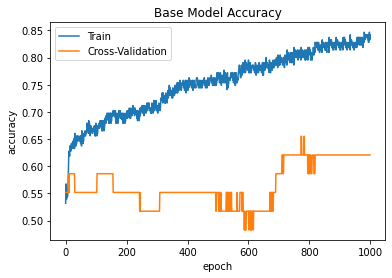

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Base Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

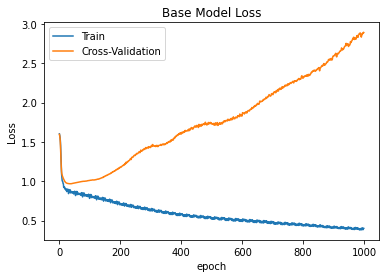

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Base Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [20]:
print('Train Split: ')
loss, accuracy = base_model.evaluate(x_train, y_train, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
8/8 [==============================] - 0s 873us/step - loss: 0.3900 - accuracy: 0.8444
Accuracy   :  0.84 


In [21]:
print('Evaluation Split: ')
loss, accuracy =  base_model.evaluate(x_valid, y_valid, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
1/1 - 0s - loss: 2.8886 - accuracy: 0.6207 - 15ms/epoch - 15ms/step
Accuracy   :  0.62 


In [22]:
print('Test Split: ')
loss, accuracy =  base_model.evaluate(x_test, y_test, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
1/1 - 0s - loss: 7.1553 - accuracy: 0.5357 - 15ms/epoch - 15ms/step
Accuracy   :  0.54


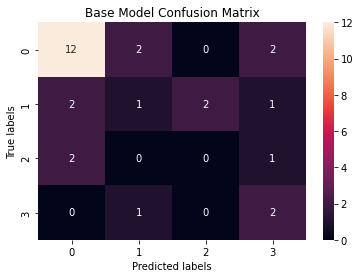

In [23]:
from sklearn.metrics import confusion_matrix

base_cm_ax = plt.subplot()
base_model_predict_results = base_model.predict(x_test)

base_model_predict_results = base_model_predict_results.argmax(axis = 1)

test_labels = y_test.to_numpy().argmax(axis = 1)

base_cm = confusion_matrix(test_labels, base_model_predict_results)

sns.heatmap(base_cm, annot=True, ax = base_cm_ax);

base_cm_ax.set_xlabel('Predicted labels');base_cm_ax.set_ylabel('True labels'); 
base_cm_ax.set_title('Base Model Confusion Matrix'); 

## Training Model with Gaussian Noise Layer

In [24]:
from tensorflow.keras.layers import GaussianNoise

def build_gaussian_model():
    model = Sequential()
    
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'sigmoid', input_shape = (x_train.shape[1], )))
    model.add(GaussianNoise(0.1, input_shape = (x_train.shape[1], )))
    model.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(5, kernel_initializer = 'uniform', activation='softmax'))
    
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

EPOCHS = 1000
batch_size = 10

gaussian_model = build_gaussian_model()
print('Gaussian Model Summary:')
gaussian_model.summary()


with tf.device('/CPU:0'):
    history = gaussian_model.fit(
        x_train, 
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=False,
        steps_per_epoch = int(x_train.shape[0] / batch_size) ,
        validation_data = (x_valid, y_valid),   
    )

Gaussian Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 98        
                                                                 
 gaussian_noise (GaussianNoi  (None, 7)                0         
 se)                                                             
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 5)                 40        
                                                                 
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
22/22 [==============================] - 0s 7ms/step - loss: 1.5982 - accuracy: 0.563

22/22 [==============================] - 0s 2ms/step - loss: 0.9187 - accuracy: 0.6326 - val_loss: 0.9915 - val_accuracy: 0.5517
Epoch 52/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8935 - accuracy: 0.6558 - val_loss: 0.9914 - val_accuracy: 0.5862
Epoch 53/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.9173 - accuracy: 0.6140 - val_loss: 0.9912 - val_accuracy: 0.5862
Epoch 54/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8696 - accuracy: 0.6558 - val_loss: 0.9915 - val_accuracy: 0.5862
Epoch 55/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.9042 - accuracy: 0.6558 - val_loss: 0.9912 - val_accuracy: 0.5862
Epoch 56/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8989 - accuracy: 0.6558 - val_loss: 0.9907 - val_accuracy: 0.5862
Epoch 57/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.9081 - accuracy: 0.6558 - val_loss: 0.9912 - val_accuracy: 0.5862
Epoch 58/1000

22/22 [==============================] - 0s 2ms/step - loss: 0.8695 - accuracy: 0.6605 - val_loss: 0.9875 - val_accuracy: 0.5862
Epoch 109/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8767 - accuracy: 0.6372 - val_loss: 0.9878 - val_accuracy: 0.5862
Epoch 110/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8959 - accuracy: 0.6372 - val_loss: 0.9875 - val_accuracy: 0.5862
Epoch 111/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8851 - accuracy: 0.6698 - val_loss: 0.9880 - val_accuracy: 0.5862
Epoch 112/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8923 - accuracy: 0.6465 - val_loss: 0.9884 - val_accuracy: 0.5862
Epoch 113/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8983 - accuracy: 0.6512 - val_loss: 0.9886 - val_accuracy: 0.5862
Epoch 114/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8863 - accuracy: 0.6651 - val_loss: 0.9886 - val_accuracy: 0.5862
Epoch 1

Epoch 165/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.9011 - accuracy: 0.6558 - val_loss: 0.9990 - val_accuracy: 0.5862
Epoch 166/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.9013 - accuracy: 0.6512 - val_loss: 0.9989 - val_accuracy: 0.5862
Epoch 167/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8679 - accuracy: 0.6558 - val_loss: 0.9996 - val_accuracy: 0.5862
Epoch 168/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8982 - accuracy: 0.6372 - val_loss: 0.9999 - val_accuracy: 0.5862
Epoch 169/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8404 - accuracy: 0.6744 - val_loss: 1.0009 - val_accuracy: 0.5862
Epoch 170/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8749 - accuracy: 0.6465 - val_loss: 1.0010 - val_accuracy: 0.5862
Epoch 171/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8750 - accuracy: 0.6512 - val_loss: 1.0017 - val_accuracy:

Epoch 222/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8564 - accuracy: 0.6698 - val_loss: 1.0138 - val_accuracy: 0.5862
Epoch 223/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.6698 - val_loss: 1.0145 - val_accuracy: 0.5862
Epoch 224/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8629 - accuracy: 0.6744 - val_loss: 1.0147 - val_accuracy: 0.5862
Epoch 225/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8691 - accuracy: 0.6419 - val_loss: 1.0155 - val_accuracy: 0.5862
Epoch 226/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8678 - accuracy: 0.6605 - val_loss: 1.0165 - val_accuracy: 0.5862
Epoch 227/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8612 - accuracy: 0.6465 - val_loss: 1.0167 - val_accuracy: 0.5862
Epoch 228/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8609 - accuracy: 0.6465 - val_loss: 1.0170 - val_accuracy:

Epoch 279/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8326 - accuracy: 0.6930 - val_loss: 1.0410 - val_accuracy: 0.5862
Epoch 280/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8603 - accuracy: 0.6419 - val_loss: 1.0412 - val_accuracy: 0.5862
Epoch 281/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8632 - accuracy: 0.6744 - val_loss: 1.0415 - val_accuracy: 0.5862
Epoch 282/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8253 - accuracy: 0.6744 - val_loss: 1.0418 - val_accuracy: 0.5862
Epoch 283/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8709 - accuracy: 0.6465 - val_loss: 1.0421 - val_accuracy: 0.5862
Epoch 284/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8140 - accuracy: 0.6930 - val_loss: 1.0438 - val_accuracy: 0.5862
Epoch 285/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8552 - accuracy: 0.6512 - val_loss: 1.0437 - val_accuracy:

Epoch 336/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8592 - accuracy: 0.6558 - val_loss: 1.0709 - val_accuracy: 0.5172
Epoch 337/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8099 - accuracy: 0.6744 - val_loss: 1.0711 - val_accuracy: 0.5172
Epoch 338/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8180 - accuracy: 0.6837 - val_loss: 1.0734 - val_accuracy: 0.5172
Epoch 339/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8406 - accuracy: 0.6884 - val_loss: 1.0734 - val_accuracy: 0.5172
Epoch 340/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8316 - accuracy: 0.6698 - val_loss: 1.0742 - val_accuracy: 0.5517
Epoch 341/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8369 - accuracy: 0.6791 - val_loss: 1.0743 - val_accuracy: 0.5517
Epoch 342/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8225 - accuracy: 0.6837 - val_loss: 1.0741 - val_accuracy:

Epoch 393/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.6930 - val_loss: 1.1011 - val_accuracy: 0.5172
Epoch 394/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7998 - accuracy: 0.6744 - val_loss: 1.1018 - val_accuracy: 0.5172
Epoch 395/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8036 - accuracy: 0.6837 - val_loss: 1.1020 - val_accuracy: 0.5172
Epoch 396/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8245 - accuracy: 0.6698 - val_loss: 1.1016 - val_accuracy: 0.5172
Epoch 397/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8063 - accuracy: 0.6698 - val_loss: 1.1018 - val_accuracy: 0.5172
Epoch 398/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8453 - accuracy: 0.6605 - val_loss: 1.1013 - val_accuracy: 0.5172
Epoch 399/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7894 - accuracy: 0.6698 - val_loss: 1.1007 - val_accuracy:

Epoch 450/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8059 - accuracy: 0.6698 - val_loss: 1.1166 - val_accuracy: 0.5172
Epoch 451/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8147 - accuracy: 0.6698 - val_loss: 1.1182 - val_accuracy: 0.5172
Epoch 452/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7878 - accuracy: 0.6884 - val_loss: 1.1192 - val_accuracy: 0.5172
Epoch 453/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7738 - accuracy: 0.7116 - val_loss: 1.1207 - val_accuracy: 0.5172
Epoch 454/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7722 - accuracy: 0.7070 - val_loss: 1.1205 - val_accuracy: 0.5172
Epoch 455/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8018 - accuracy: 0.6977 - val_loss: 1.1235 - val_accuracy: 0.5172
Epoch 456/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7831 - accuracy: 0.6884 - val_loss: 1.1266 - val_accuracy:

Epoch 507/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7775 - accuracy: 0.6773 - val_loss: 1.1293 - val_accuracy: 0.5862
Epoch 508/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7475 - accuracy: 0.7163 - val_loss: 1.1285 - val_accuracy: 0.5862
Epoch 509/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7687 - accuracy: 0.6977 - val_loss: 1.1295 - val_accuracy: 0.5862
Epoch 510/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7807 - accuracy: 0.6837 - val_loss: 1.1284 - val_accuracy: 0.5862
Epoch 511/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7807 - accuracy: 0.6791 - val_loss: 1.1258 - val_accuracy: 0.5862
Epoch 512/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7719 - accuracy: 0.6977 - val_loss: 1.1239 - val_accuracy: 0.5862
Epoch 513/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7807 - accuracy: 0.6651 - val_loss: 1.1230 - val_accuracy:

Epoch 564/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7742 - accuracy: 0.7070 - val_loss: 1.1121 - val_accuracy: 0.5862
Epoch 565/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7633 - accuracy: 0.6930 - val_loss: 1.1158 - val_accuracy: 0.5862
Epoch 566/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7753 - accuracy: 0.6744 - val_loss: 1.1168 - val_accuracy: 0.5862
Epoch 567/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7382 - accuracy: 0.6977 - val_loss: 1.1153 - val_accuracy: 0.5862
Epoch 568/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7462 - accuracy: 0.7116 - val_loss: 1.1148 - val_accuracy: 0.5862
Epoch 569/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7494 - accuracy: 0.7116 - val_loss: 1.1157 - val_accuracy: 0.5862
Epoch 570/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7495 - accuracy: 0.7023 - val_loss: 1.1168 - val_accuracy:

Epoch 621/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7561 - accuracy: 0.6884 - val_loss: 1.1124 - val_accuracy: 0.5862
Epoch 622/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.7273 - val_loss: 1.1132 - val_accuracy: 0.5862
Epoch 623/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7385 - accuracy: 0.7070 - val_loss: 1.1108 - val_accuracy: 0.5862
Epoch 624/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7279 - accuracy: 0.7023 - val_loss: 1.1081 - val_accuracy: 0.5862
Epoch 625/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.7116 - val_loss: 1.1074 - val_accuracy: 0.5862
Epoch 626/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7514 - accuracy: 0.6698 - val_loss: 1.1075 - val_accuracy: 0.5862
Epoch 627/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7282 - accuracy: 0.6977 - val_loss: 1.1066 - val_accuracy:

Epoch 678/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7187 - accuracy: 0.6837 - val_loss: 1.1001 - val_accuracy: 0.5862
Epoch 679/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7432 - accuracy: 0.6698 - val_loss: 1.0987 - val_accuracy: 0.6207
Epoch 680/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7286 - accuracy: 0.7023 - val_loss: 1.0987 - val_accuracy: 0.6207
Epoch 681/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7361 - accuracy: 0.6930 - val_loss: 1.1012 - val_accuracy: 0.6207
Epoch 682/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.6977 - val_loss: 1.1021 - val_accuracy: 0.6207
Epoch 683/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7259 - accuracy: 0.6977 - val_loss: 1.1001 - val_accuracy: 0.5862
Epoch 684/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.7116 - val_loss: 1.1005 - val_accuracy:

Epoch 735/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.6837 - val_loss: 1.1000 - val_accuracy: 0.6552
Epoch 736/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7169 - accuracy: 0.6884 - val_loss: 1.0976 - val_accuracy: 0.6207
Epoch 737/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7226 - accuracy: 0.6864 - val_loss: 1.1005 - val_accuracy: 0.6207
Epoch 738/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.7116 - val_loss: 1.0993 - val_accuracy: 0.6207
Epoch 739/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6977 - val_loss: 1.1001 - val_accuracy: 0.6207
Epoch 740/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.6977 - val_loss: 1.1030 - val_accuracy: 0.6552
Epoch 741/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.7070 - val_loss: 1.1007 - val_accuracy:

Epoch 792/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.7023 - val_loss: 1.0860 - val_accuracy: 0.6207
Epoch 793/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6884 - val_loss: 1.0858 - val_accuracy: 0.6207
Epoch 794/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.7023 - val_loss: 1.0851 - val_accuracy: 0.6207
Epoch 795/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.7023 - val_loss: 1.0847 - val_accuracy: 0.6207
Epoch 796/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6884 - val_loss: 1.0856 - val_accuracy: 0.6207
Epoch 797/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.7302 - val_loss: 1.0886 - val_accuracy: 0.6207
Epoch 798/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.7116 - val_loss: 1.0919 - val_accuracy:

Epoch 849/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.7163 - val_loss: 1.0780 - val_accuracy: 0.6552
Epoch 850/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.7256 - val_loss: 1.0756 - val_accuracy: 0.6552
Epoch 851/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.7116 - val_loss: 1.0756 - val_accuracy: 0.6552
Epoch 852/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.7045 - val_loss: 1.0751 - val_accuracy: 0.6552
Epoch 853/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.7256 - val_loss: 1.0735 - val_accuracy: 0.6552
Epoch 854/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.7349 - val_loss: 1.0696 - val_accuracy: 0.6552
Epoch 855/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.7163 - val_loss: 1.0672 - val_accuracy:

Epoch 906/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6977 - val_loss: 1.0713 - val_accuracy: 0.6552
Epoch 907/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7023 - val_loss: 1.0680 - val_accuracy: 0.6552
Epoch 908/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7256 - val_loss: 1.0683 - val_accuracy: 0.6552
Epoch 909/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.6977 - val_loss: 1.0641 - val_accuracy: 0.6552
Epoch 910/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.7209 - val_loss: 1.0640 - val_accuracy: 0.6552
Epoch 911/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.7163 - val_loss: 1.0611 - val_accuracy: 0.6552
Epoch 912/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.7349 - val_loss: 1.0599 - val_accuracy:

Epoch 963/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.7209 - val_loss: 1.0791 - val_accuracy: 0.6552
Epoch 964/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7535 - val_loss: 1.0797 - val_accuracy: 0.6552
Epoch 965/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.7395 - val_loss: 1.0795 - val_accuracy: 0.6552
Epoch 966/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7349 - val_loss: 1.0795 - val_accuracy: 0.6552
Epoch 967/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7409 - val_loss: 1.0792 - val_accuracy: 0.6552
Epoch 968/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.7302 - val_loss: 1.0796 - val_accuracy: 0.6552
Epoch 969/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.7581 - val_loss: 1.0773 - val_accuracy:

In [25]:
print('Summary of the gaussian layer model results after each epoch: ')
gaussian_hist = pd.DataFrame(history.history)
gaussian_hist['epoch'] = history.epoch
gaussian_hist.tail()

Summary of the gaussian layer model results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
995,0.611758,0.734884,1.094680,0.620690,995
996,0.617450,0.730233,1.091138,0.655172,996
997,0.628996,0.730233,1.091408,0.655172,997
998,0.619194,0.725581,1.090826,0.620690,998
999,0.619180,0.744186,1.091026,0.620690,999


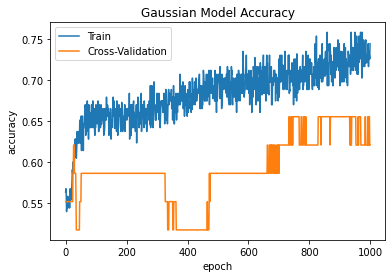

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Gaussian Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

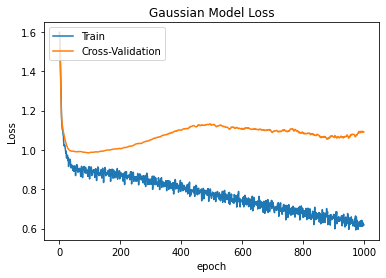

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Gaussian Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [28]:
print('Train Split: ')
loss, accuracy = gaussian_model.evaluate(x_train, y_train, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
8/8 [==============================] - 0s 945us/step - loss: 0.5865 - accuracy: 0.7422
Accuracy   :  0.74 


In [29]:
print('Evaluation Split: ')
loss, accuracy =  gaussian_model.evaluate(x_valid, y_valid, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
1/1 - 0s - loss: 1.0910 - accuracy: 0.6207 - 15ms/epoch - 15ms/step
Accuracy   :  0.62 


In [30]:
print('Test Split: ')
loss, accuracy =  gaussian_model.evaluate(x_test, y_test, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
1/1 - 0s - loss: 0.9220 - accuracy: 0.6429 - 15ms/epoch - 15ms/step
Accuracy   :  0.64


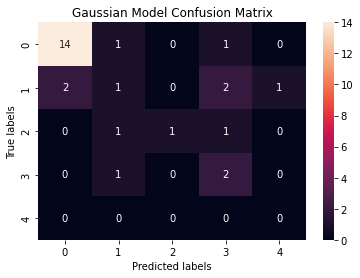

In [31]:
from sklearn.metrics import confusion_matrix

gaussian_cm_ax = plt.subplot()
gaussian_model_predict_results = gaussian_model.predict(x_test)

gaussian_model_predict_results = gaussian_model_predict_results.argmax(axis = 1)

test_labels = y_test.to_numpy().argmax(axis = 1)

gaussian_cm = confusion_matrix(test_labels, gaussian_model_predict_results)

sns.heatmap(gaussian_cm, annot=True, ax = gaussian_cm_ax);

gaussian_cm_ax.set_xlabel('Predicted labels');gaussian_cm_ax.set_ylabel('True labels'); 
gaussian_cm_ax.set_title('Gaussian Model Confusion Matrix'); 

In [32]:
# A transformation function needs to be made from the information we've got through the confusion matrix this is a test model

trans_dict = dict()

import numpy as np

cm = np.array([ [11, 1, 0, 0, 0], [4, 1, 0, 1, 2], [1, 0, 1, 0, 0], [0, 0, 1, 1, 2], [1, 0, 0, 1, 0] ])

total_correct = 0

for i in range(5):
    trans_dict[i] = dict()
    total_correct += cm[i][i]
    trans_dict[i]['correct_pred'] = cm[i][i]
    trans_dict[i]['wrong_pred'] = sum(cm[i][:i]) + sum(cm[i][i+1:])
    if cm[i][i] == np.max(cm[i]):
        trans_dict[i]['high'] = True
        temp = np.delete(cm[i], i)
        trans_dict[i]['high_value'] = max(temp)
    else:
        trans_dict[i]['high'] = False
        trans_dict[i]['high_value'] = max(cm[i])

for key in trans_dict:
    trans_dict[key]['reg_f'] = (total_correct - trans_dict[key]['correct_pred'])*2 + \
    ((trans_dict[key]['wrong_pred'] - trans_dict[key]['high_value'])//2 + trans_dict[key]['high_value'])//2
        

trans_dict

{0: {'correct_pred': 11,
  'wrong_pred': 1,
  'high': True,
  'high_value': 1,
  'reg_f': 6},
 1: {'correct_pred': 1,
  'wrong_pred': 7,
  'high': False,
  'high_value': 4,
  'reg_f': 28},
 2: {'correct_pred': 1,
  'wrong_pred': 1,
  'high': True,
  'high_value': 1,
  'reg_f': 26},
 3: {'correct_pred': 1,
  'wrong_pred': 3,
  'high': False,
  'high_value': 2,
  'reg_f': 27},
 4: {'correct_pred': 0,
  'wrong_pred': 2,
  'high': False,
  'high_value': 1,
  'reg_f': 28}}